<a href="https://colab.research.google.com/github/khushibhatia15/machine-learning-projects/blob/main/EmailSpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
data = pd.read_csv("/content/emails.csv")
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [ ]:
data.info

In [ ]:
data.isnull().sum()

In [ ]:
data.drop(columns=['Email No.'],inplace=True)

In [ ]:
data.sample(5)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
3836,3,3,3,0,0,0,9,0,0,2,...,0,0,0,0,0,0,0,1,0,0
4394,27,9,10,7,7,3,139,4,4,26,...,0,0,0,0,0,0,0,1,0,0
3988,3,0,1,1,1,2,33,1,0,8,...,0,0,0,0,0,0,0,1,0,0
455,15,17,25,11,6,3,134,1,14,29,...,0,0,0,1,0,0,0,1,0,0
3105,0,0,1,0,1,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.min()
data.max()
data.mean()
data.var()

the           137.945235
to             90.908132
ect           198.842192
and            36.553750
for            21.907283
                 ...    
military        0.019295
allowing        0.005205
ff              7.729530
dry             0.009621
Prediction      0.205950
Length: 3001, dtype: float64

Text(0.5, 1.0, 'Number of Spam and not')

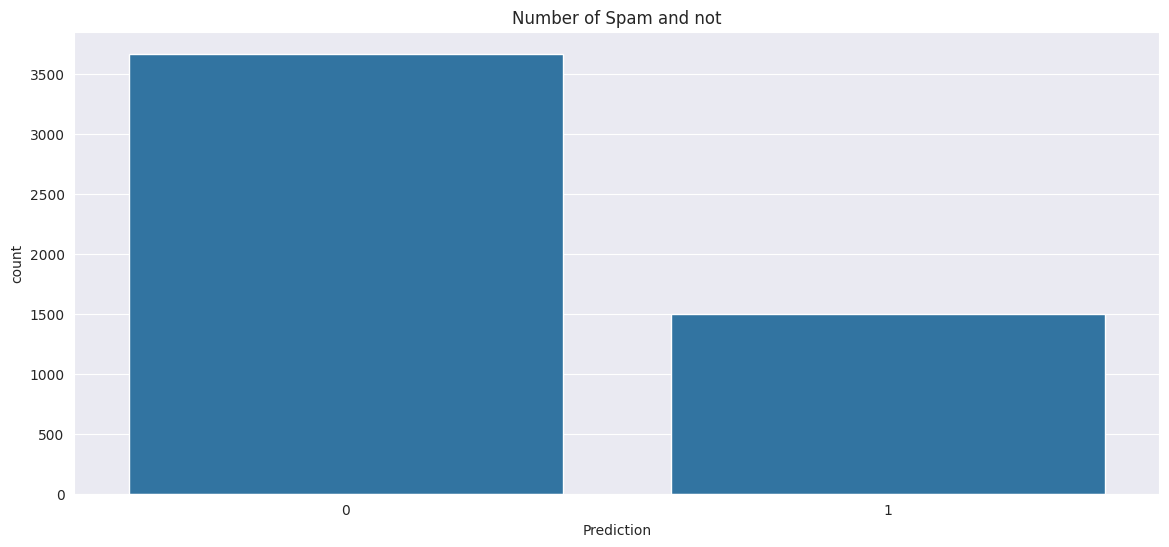

In [ ]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(x='Prediction',data=data)
plt.title('Number of Spam and not')

In [ ]:
#skewness and kurtosis
spam_skewness = skew(data['Prediction'])
spam_kurtosis = kurtosis(data['Prediction'])
print(f"Skewness of 'Prediction' column: {spam_skewness}")
print(f"Kurtosis of 'Prediction' column: {spam_kurtosis}")

Skewness of 'Prediction' column: 0.9254710865424939
Kurtosis of 'Prediction' column: -1.143503267973855


Skewness of 'in' column: 4.6233721758307
Kurtosis of 'in' column: 28.72757277033731


<ipython-input-10-0bb90a4609b5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['in'])


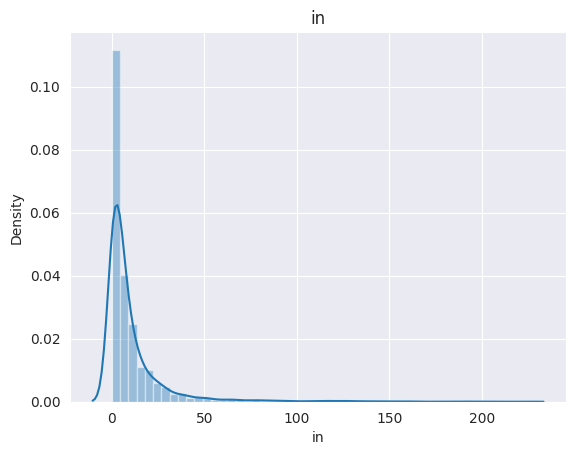

In [ ]:
#distribution plot
spam_skewness = skew(data['in'])
spam_kurtosis = kurtosis(data['in'])
print(f"Skewness of 'in' column: {spam_skewness}")
print(f"Kurtosis of 'in' column: {spam_kurtosis}")
sns.distplot(data['in'])
plt.title('in')
plt.show()

Skewness of 'out' column: 8.696531604420398
Kurtosis of 'out' column: 151.97152180285696


<ipython-input-11-9dd6a25d376d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['out'])


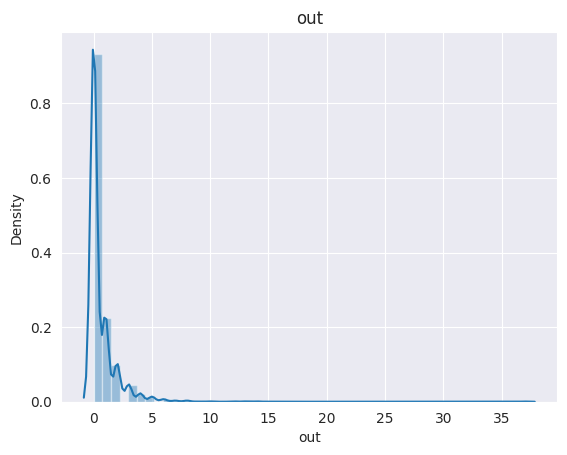

In [ ]:
#distribution plot
spam_skewness = skew(data['out'])
spam_kurtosis = kurtosis(data['out'])
print(f"Skewness of 'out' column: {spam_skewness}")
print(f"Kurtosis of 'out' column: {spam_kurtosis}")
sns.distplot(data['out'])
plt.title('out')
plt.show()

In [ ]:
#correlation
target_column = 'Prediction'
numeric_features = data.select_dtypes(include=[np.number])
cov_matrix = numeric_features.cov()
cov_matrix

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,137.945235,95.490182,55.854461,59.733618,43.104784,58.272027,806.854931,23.886931,24.847668,191.515507,...,0.011090,0.177019,0.309180,1.494534,0.115047,0.211220,0.107629,11.163506,0.058778,-0.023564
to,95.490182,90.908132,50.482698,47.585079,34.896859,44.710868,748.533276,20.918400,23.119183,162.106759,...,0.013365,0.192762,0.259070,1.389019,0.085643,0.121370,0.082585,10.779920,0.066762,0.239181
ect,55.854461,50.482698,198.842192,23.262958,24.405573,15.639429,493.970035,9.477642,95.715311,81.130436,...,0.200398,0.088503,0.075824,0.494308,0.005963,-0.015063,0.004444,5.545821,0.003446,-0.772922
and,59.733618,47.585079,23.262958,36.553750,21.260151,30.496390,431.622451,12.436391,9.940142,101.921164,...,0.003294,0.126104,0.192582,0.872688,0.088443,0.070669,0.054421,6.727391,0.025194,0.313789
for,43.104784,34.896859,24.405573,21.260151,21.907283,19.870541,305.000247,10.013165,10.731442,68.829414,...,0.010976,0.039043,0.129016,0.569478,0.060579,0.043659,0.040878,3.917810,0.017503,-0.006588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.211220,0.121370,-0.015063,0.070669,0.043659,0.063176,1.358617,0.003894,0.005255,0.323070,...,-0.000033,-0.000083,0.000704,0.008251,0.000552,0.019295,0.000553,0.019126,0.000148,0.004088
allowing,0.107629,0.082585,0.004444,0.054421,0.040878,0.048894,0.665661,0.025760,-0.000486,0.192109,...,-0.000020,-0.000051,-0.000043,0.000762,0.001917,0.000553,0.005205,0.019298,-0.000028,0.000369
ff,11.163506,10.779920,5.545821,6.727391,3.917810,7.694550,113.087057,2.339731,2.212482,24.032425,...,0.001589,0.040909,0.042292,0.260149,0.030531,0.019126,0.019298,7.729530,0.013550,0.170934
dry,0.058778,0.066762,0.003446,0.025194,0.017503,0.016134,0.805913,0.012223,0.000411,0.147050,...,-0.000035,0.000686,-0.000074,0.001058,-0.000030,0.000148,-0.000028,0.013550,0.009621,-0.000279


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = data.drop('Prediction', axis=1)
y = data['Prediction']
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)
data_lda = pd.DataFrame(X_lda, columns=['LDA_Component'])
data_lda['Prediction'] = y

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.drop('Prediction', axis=1)
y = data['Prediction']

X_standardized = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

data_pca = pd.DataFrame(X_pca, columns=['PCA_Component1', 'PCA_Component2'])
data_pca['Prediction'] = y
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [ ]:
X = data.drop("Prediction",axis=1)
y= data["Prediction"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [ ]:
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
print(f"Naive Bayesian Accuracy: {accuracy_score(y_test, nb_predictions)}")

Naive Bayesian Accuracy: 0.9478260869565217


In [ ]:
predictions= nb_classifier.predict(X_test)
predictions[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)
print('Naive Bayesian Confusion Matrix:\n', conf_matrix_nb)
print('Naive Bayesian Classification Report:\n', classification_report(y_test, nb_predictions))

Naive Bayesian Confusion Matrix:
 [[697  42]
 [ 12 284]]
Naive Bayesian Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       739
           1       0.87      0.96      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



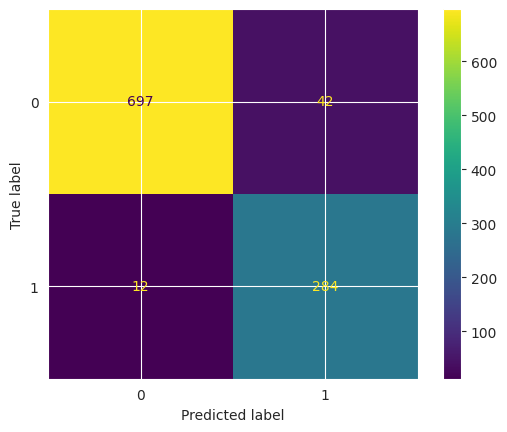

In [ ]:
#draw confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, nb_predictions)
plt.show()